In [1]:
import sys
import os
import torch
import torchvision
import skimage.io as io
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
from PIL import Image
import matplotlib
from torch.autograd import Variable
from matplotlib import pyplot as plt
import torch.optim as optim
sys.path.insert(0, '/home/max/pytorch-image-segmentation/')
from pytorch_image_segmentation.datasets import pascal_voc as pascal
from pytorch_image_segmentation.models.fcn_16s import Vgg_16_fcn16
from torch.utils.data import DataLoader
from pytorch_image_segmentation.transforms import ComposeJoint
from sklearn.metrics import confusion_matrix

net = Vgg_16_fcn16(num_classes=21)
net.load_state_dict(torch.load('/home/max/fcn_16'), False)

transform = ComposeJoint([
    
    [transforms.ToTensor(),None],
    [transforms.Normalize(mean = (0.485, 0.456, 0.406),std = (0.229, 0.224, 0.225)),None],
    [None, transforms.Lambda(lambda x: torch.from_numpy(np.asarray(x)).long())]
    
                        ])

val_dataset = pascal.PascalVOCSegmentation(download=False, train=False, joint_transform=transform)
val_dataloader = DataLoader(val_dataset,shuffle=False, num_workers=2)

val_iterator = iter(val_dataloader)

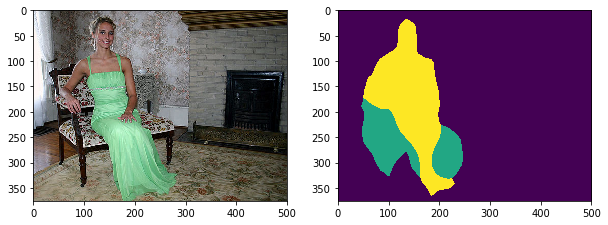

In [5]:
%matplotlib inline

inputs, labels = val_iterator.next()


net.eval()



outputs = net(inputs)
inputs = inputs.squeeze().permute(1, 2, 0).numpy() * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
_, outputs = torch.max(outputs, dim=1)
outputs = outputs.squeeze().numpy()


f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(inputs)
f.add_subplot(1,2,2)
plt.imshow(outputs)
#TODO:Add labels pic
#f.add_subplot(1,3,3)
#plt.imshow(labels.squeeze())
plt.show()